In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

In [3]:
x_data = np.random.rand(100)
noise = np.random.normal(0,0.01,x_data.shape)
y_data = x_data*0.1 + 0.2 + noise

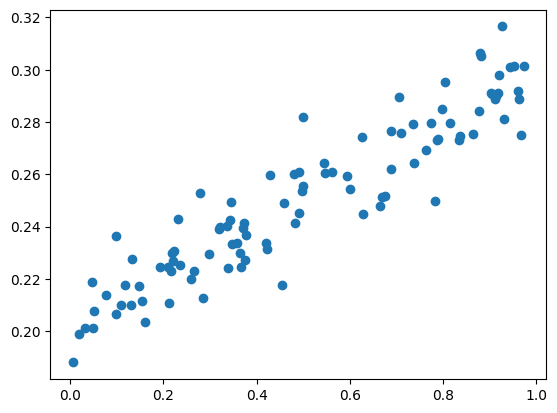

In [4]:
plt.scatter(x_data,y_data)
plt.show()

In [5]:
x_data = x_data.reshape(-1,1) #一列
y_data = y_data.reshape(-1,1)

In [6]:
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [11]:
# 构建神经网络模型
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.fc = nn.Linear(1,1)
        
    # 定义网络计算
    def forward(self,x):
        out = self.fc(x)
        return out

In [14]:
#定义模型
model = LinearRegression()
#定义代价函数
mes_loss = nn.MSELoss()
#定义优化器
optimizer = optim.SGD(model.parameters(),lr=0.1)


In [15]:
#训练模型
for i in range(1001):
    out = model(inputs)
    # 计算loss
    loss = mes_loss(out,target)
    # 梯度清零
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()

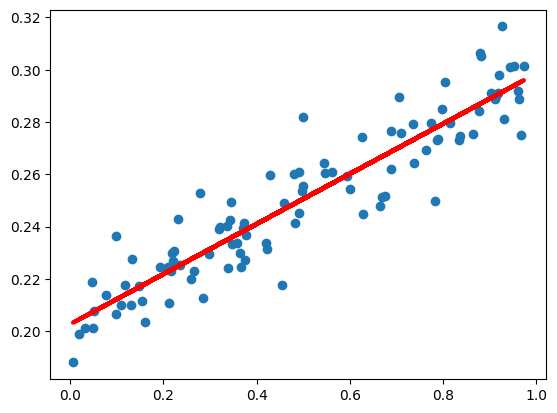

In [20]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()